In [268]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import datetime 
from datetime import datetime,timedelta

plt.style.use('default')

# importing River Temperature for 2020 dataframe from previous script
%store -r temp_2020_df

In [269]:
temp_2020_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 8763 to 10226
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Time                   1460 non-null   datetime64[ns]
 1   Temp_river             1460 non-null   float64       
 2   Temp_air               1460 non-null   float64       
 3   Temp_SMA               1460 non-null   float64       
 4   Temp_network           1460 non-null   float64       
 5   COP_BIHP               1460 non-null   float64       
 6   HDD                    1460 non-null   float64       
 7   Space_Heating_Demand   1460 non-null   float64       
 8   DHW_local              1460 non-null   float64       
 9   BIHP_Demand            1460 non-null   float64       
 10  Cooking_local          1460 non-null   float64       
 11  Total_Domestic_Demand  1460 non-null   float64       
 12  COP_60                 1460 non-null   float64       
 13 

In [270]:
temp_2020_df.describe()

,Temp_river,Temp_air,Temp_SMA,Temp_network,COP_BIHP,HDD,Space_Heating_Demand,DHW_local,BIHP_Demand,Cooking_local,Total_Domestic_Demand,COP_60,COP_DHW
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1.460000e+03,1460.000000,1460.000000,1460.000000
mean,10.585627,11.270570,13.383459,13.383459,2.829009,1.199899,1.945771,0.554708,2.500478,1.203258e-01,2.620804,2.829009,2.829009
std,5.529673,4.891476,2.213340,2.213340,0.108074,1.030421,1.671996,0.019926,1.686349,1.443784e-15,1.686349,0.108074,0.108074
min,-2.221879,1.524540,12.000000,12.000000,2.763095,0.000000,0.000000,0.475475,0.475475,1.203258e-01,0.595801,2.763095,2.763095
25%,6.529434,6.844139,12.000000,12.000000,2.763095,0.000000,0.000000,0.541272,0.541798,1.203258e-01,0.662124,2.763095,2.763095
50%,10.183606,10.941674,12.000000,12.000000,2.763095,1.139581,1.848555,0.567162,2.415717,1.203258e-01,2.536043,2.763095,2.763095
75%,14.633891,15.958857,14.875908,14.875908,2.895262,2.163965,3.510243,0.567162,4.077405,1.203258e-01,4.197731,2.895262,2.895262
max,29.105459,22.466850,22.184586,22.184586,3.295913,3.493865,5.667519,0.567162,6.234682,1.203258e-01,6.355007,3.295913,3.295913


In [271]:
# Defining Network temperature 
Temp_network = temp_2020_df['Temp_SMA']
Temp_network[Temp_network < 12] = 12

# Adding Network temperature to dataframe
temp_2020_df['Temp_network'] = Temp_network

<ipython-input-271-4f84d8d06345>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Temp_network[Temp_network < 12] = 12


In [272]:
# Calculating COP
Domestic_temp = 273.15 + 75
Performance_factor = 0.5
T_domestic = np.full((len(temp_2020_df['Temp_network']),1), Domestic_temp)
T_supply = np.array([temp_2020_df['Temp_network'] + 273.15]).T

COP_domestic_ideal = T_domestic / (T_domestic - T_supply)
COP_domestic = (COP_domestic_ideal) * Performance_factor

temp_2020_df['COP_BIHP'] = COP_domestic

In [273]:
# Calculating COP for DHW
Domestic_temp2 = 273.15 + 60
Performance_factor2 = 0.5
T_domestic2 = np.full((len(temp_2020_df['Temp_network']),1), Domestic_temp)
T_supply2 = np.array([temp_2020_df['Temp_network'] + 273.15]).T

COP_domestic_ideal2 = T_domestic2 / (T_domestic2 - T_supply2)
COP_domestic2 = (COP_domestic_ideal2) * Performance_factor2

temp_2020_df['COP_DHW'] = COP_domestic2

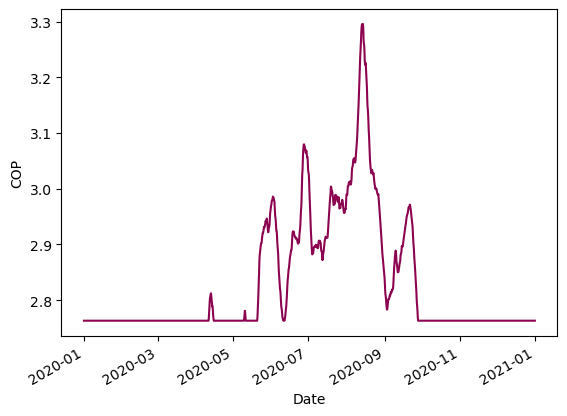

In [274]:
# Plotting COP variation over the year 
fig = plt.figure()
plt.plot(temp_2020_df['Time'], temp_2020_df['COP_BIHP'],'#8c044F')
plt.xlabel('Date')
plt.ylabel('COP')
fig.autofmt_xdate()


In [275]:
min(COP_domestic)

array([2.76309524])

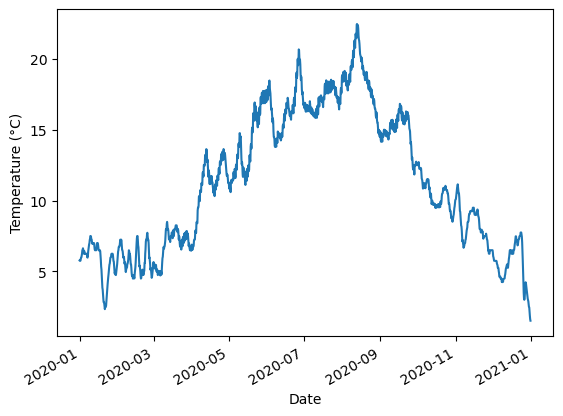

In [276]:
fig = plt.figure()
plt.plot(temp_2020_df['Time'],temp_2020_df['Temp_air'])
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
fig.autofmt_xdate()


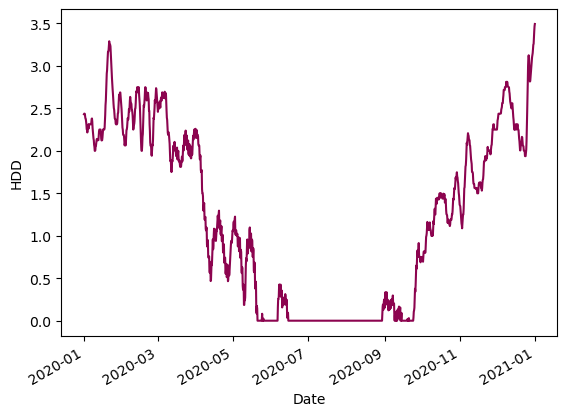

In [277]:
# Calculating HDD
T_b = 15.5
T_air = np.array([temp_2020_df['Temp_air']]).T
HDD = np.zeros((len(T_air),1))

for i in range(len(T_air)):
    if T_air[i] < 15.5:
        HDD[i] = (T_b - T_air[i]) * (6/24)
    else: 
        HDD[i] = 0

temp_2020_df['HDD'] = HDD

fig = plt.figure()
plt.plot(temp_2020_df['Time'], temp_2020_df['HDD'],'#8c044F')
plt.xlabel('Date')
plt.ylabel('HDD')
fig.autofmt_xdate()


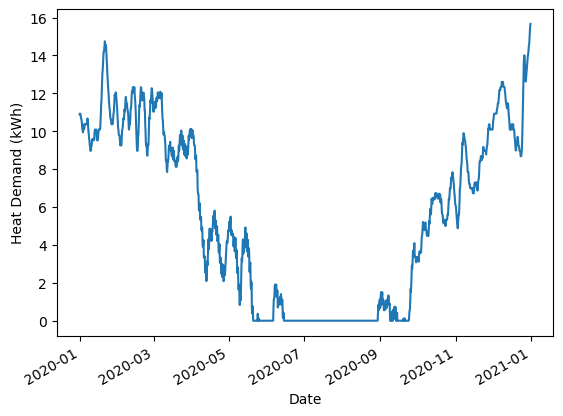

In [278]:
# Heating Demand 
Heat_demand = np.zeros((len(T_air),1))
Total_HDD = sum(HDD)
Total_heat = 7852    # previously calculated total heating demand 

Heat_demand = (HDD / Total_HDD) * Total_heat    # in kWh for 6 hour slots 

fig = plt.figure()
plt.plot(temp_2020_df['Time'], Heat_demand)
plt.xlabel('Date')
plt.ylabel('Heat Demand (kWh)')
fig.autofmt_xdate()

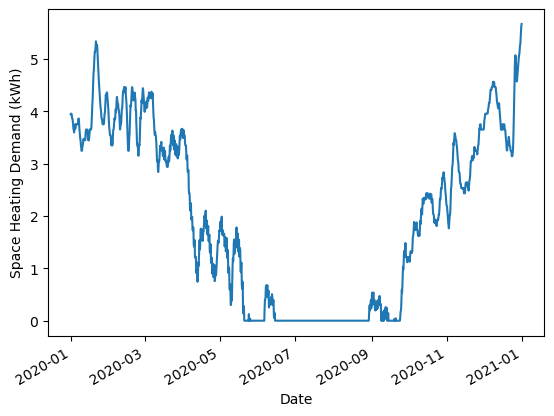

In [279]:
# Electricity Demand for space heating 
Domestic_Demand = Heat_demand / COP_domestic

temp_2020_df['Space_Heating_Demand'] = Domestic_Demand

fig = plt.figure()
plt.plot(temp_2020_df['Time'], Domestic_Demand)
plt.xlabel('Date')
plt.ylabel('Space Heating Demand (kWh)')
fig.autofmt_xdate()


In [280]:
SpaceHeating_Demand = Domestic_Demand.sum()
print(SpaceHeating_Demand)

2840.8254680239725


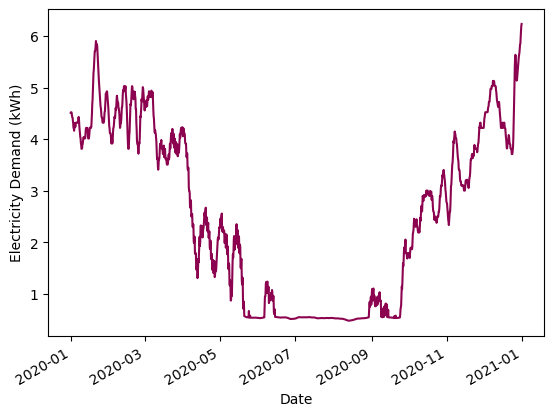

In [281]:
# Adding Hot Water demand 
DHW_heating = 2288    # heating demand 
DHW_total = DHW_heating / COP_domestic2
DHW_local = DHW_total / len(Domestic_Demand)

temp_2020_df['DHW_local'] = DHW_local

BIHP_Demand = Domestic_Demand + DHW_local   # BIHP demand kWh in 6 hour slots 

temp_2020_df['BIHP_Demand'] = BIHP_Demand

fig = plt.figure()
plt.plot(temp_2020_df['Time'], BIHP_Demand,'#8c044F')
plt.xlabel('Date')
plt.ylabel('Electricity Demand (kWh)')
fig.autofmt_xdate()

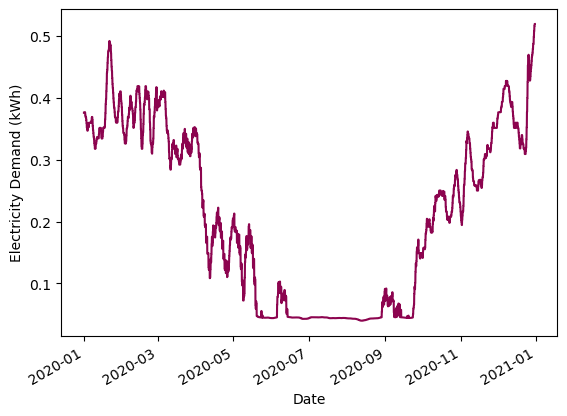

In [282]:
# converting to 30 min data 
year = '2020'
dti = pd.date_range(year + '-01-01', periods=17520, freq="0.5H")
 
BIHP_30_demand = np.zeros(17520)
 
for i in range(len(temp_2020_df['Time'])):
  amount = temp_2020_df.iloc[i]['BIHP_Demand']/ 12
  small_array = amount * np.ones(12)
  BIHP_30_demand[i*12 : (i + 1)*12] = small_array

# plotting 30 min data 
fig = plt.figure()
plt.plot(dti, BIHP_30_demand, '#8c044F')
plt.xlabel('Date')
plt.ylabel('Electricity Demand (kWh)')
fig.autofmt_xdate()

In [283]:
BIHP_annual_demand = BIHP_Demand.sum()
print(BIHP_annual_demand)

3650.6984860670245


In [284]:
# sizing BIHP 
BIHP_max_demand = BIHP_Demand.max()     # finding max electrical 
max_index = np.argmax(BIHP_Demand)
print(BIHP_max_demand)

BIHP_max = 6    #rounding up for safety 
COP_max_demand = COP_domestic[max_index]

BIHP_Qc = (BIHP_max / 6) * (COP_max_demand - 1)
print(BIHP_Qc)

6.234681500567229
[1.76309524]


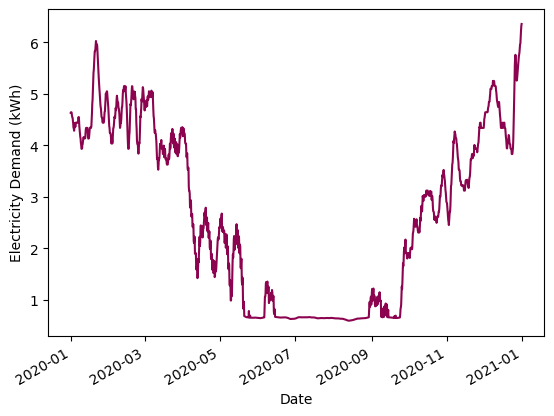

In [293]:
# Including cooking demand for total domestic demand 
Cooking_total = 130 * (1/0.74)
Cooking_local = Cooking_total / len(BIHP_Demand)

temp_2020_df['Cooking_local'] = Cooking_local

Total_Domestic_Demand = BIHP_Demand + Cooking_local

temp_2020_df['Total_Domestic_Demand'] = Total_Domestic_Demand

fig = plt.figure()
plt.plot(temp_2020_df['Time'], Total_Domestic_Demand,'#8c044F')
plt.xlabel('Date')
plt.ylabel('Electricity Demand (kWh)')
fig.autofmt_xdate()


In [286]:
Total_Electricity_Demand = Total_Domestic_Demand.sum()
print(Total_Electricity_Demand)

3826.3741617427004


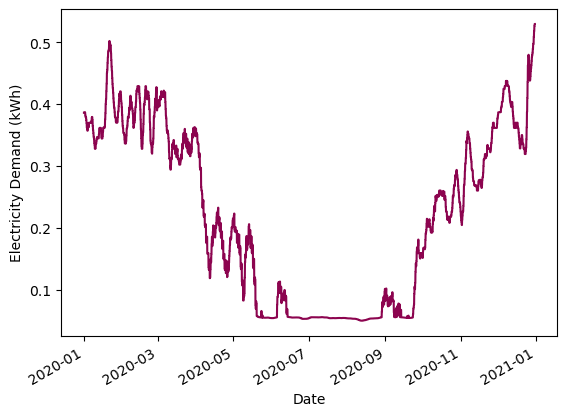

In [294]:
# converting to 30 min data 
year = '2020'
dti = pd.date_range(year + '-01-01', periods=17520, freq="0.5H")
 
Domestic_30_demand = np.zeros(17520)
 
for i in range(len(temp_2020_df['Time'])):
  amount = temp_2020_df.iloc[i]['Total_Domestic_Demand']/ 12
  small_array = amount * np.ones(12)
  Domestic_30_demand[i*12 : (i + 1)*12] = small_array

# plotting 30 min data 
fig = plt.figure()
plt.plot(dti, Domestic_30_demand, '#8c044F')
plt.xlabel('Date')
plt.ylabel('Electricity Demand (kWh)')
fig.autofmt_xdate()

In [288]:
# converting to data to csv 
d = {'Time': dti, 'Domestic Demand': Domestic_30_demand}
domestic_df = pd.DataFrame(data=d)

In [289]:
domestic_df.to_csv('domestic_demand.csv')

In [290]:
temp_2020_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 8763 to 10226
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Time                   1460 non-null   datetime64[ns]
 1   Temp_river             1460 non-null   float64       
 2   Temp_air               1460 non-null   float64       
 3   Temp_SMA               1460 non-null   float64       
 4   Temp_network           1460 non-null   float64       
 5   COP_BIHP               1460 non-null   float64       
 6   HDD                    1460 non-null   float64       
 7   Space_Heating_Demand   1460 non-null   float64       
 8   DHW_local              1460 non-null   float64       
 9   BIHP_Demand            1460 non-null   float64       
 10  Cooking_local          1460 non-null   float64       
 11  Total_Domestic_Demand  1460 non-null   float64       
 12  COP_60                 1460 non-null   float64       
 13 

In [291]:
# Storing 2020 dataframe so can import in another notebook
%store temp_2020_df

Stored 'temp_2020_df' (DataFrame)


In [292]:
temp_2020_df.describe()

,Temp_river,Temp_air,Temp_SMA,Temp_network,COP_BIHP,HDD,Space_Heating_Demand,DHW_local,BIHP_Demand,Cooking_local,Total_Domestic_Demand,COP_60,COP_DHW
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1.460000e+03,1460.000000,1460.000000,1460.000000
mean,10.585627,11.270570,13.383459,13.383459,2.829009,1.199899,1.945771,0.554708,2.500478,1.203258e-01,2.620804,2.829009,2.829009
std,5.529673,4.891476,2.213340,2.213340,0.108074,1.030421,1.671996,0.019926,1.686349,1.443784e-15,1.686349,0.108074,0.108074
min,-2.221879,1.524540,12.000000,12.000000,2.763095,0.000000,0.000000,0.475475,0.475475,1.203258e-01,0.595801,2.763095,2.763095
25%,6.529434,6.844139,12.000000,12.000000,2.763095,0.000000,0.000000,0.541272,0.541798,1.203258e-01,0.662124,2.763095,2.763095
50%,10.183606,10.941674,12.000000,12.000000,2.763095,1.139581,1.848555,0.567162,2.415717,1.203258e-01,2.536043,2.763095,2.763095
75%,14.633891,15.958857,14.875908,14.875908,2.895262,2.163965,3.510243,0.567162,4.077405,1.203258e-01,4.197731,2.895262,2.895262
max,29.105459,22.466850,22.184586,22.184586,3.295913,3.493865,5.667519,0.567162,6.234682,1.203258e-01,6.355007,3.295913,3.295913
